<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import math
from IPython.display import HTML, display

seaborn.set_context('talk')

In [2]:
def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)
    
    display(HTML('<img src onerror="{}" style="display:none">'.format(script)))

In [3]:
cell_color = 'black'
set_background(cell_color)

import math
import time

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [4]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [5]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [6]:
df.dtypes

profile_gender                                   object
profile_age                                       int64
work_country                                     object
work_province                                    object
profile_years_experience                        float64
work_years_in_company                           float64
work_years_in_current_position                  float64
work_people_in_charge_of                          int64
profile_studies_level                            object
profile_studies_level_state                      object
profile_career                                   object
profile_university                               object
profile_specialization_courses                   object
profile_open_source_contributions                object
profile_programming_as_hobby                     object
work_role                                        object
tools_platform                                   object
tools_programming_languages                     

The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation

Vemos si existen correlaciones entre variables. NO utilizaremos variables fuertemente correlacionadas en el análisis

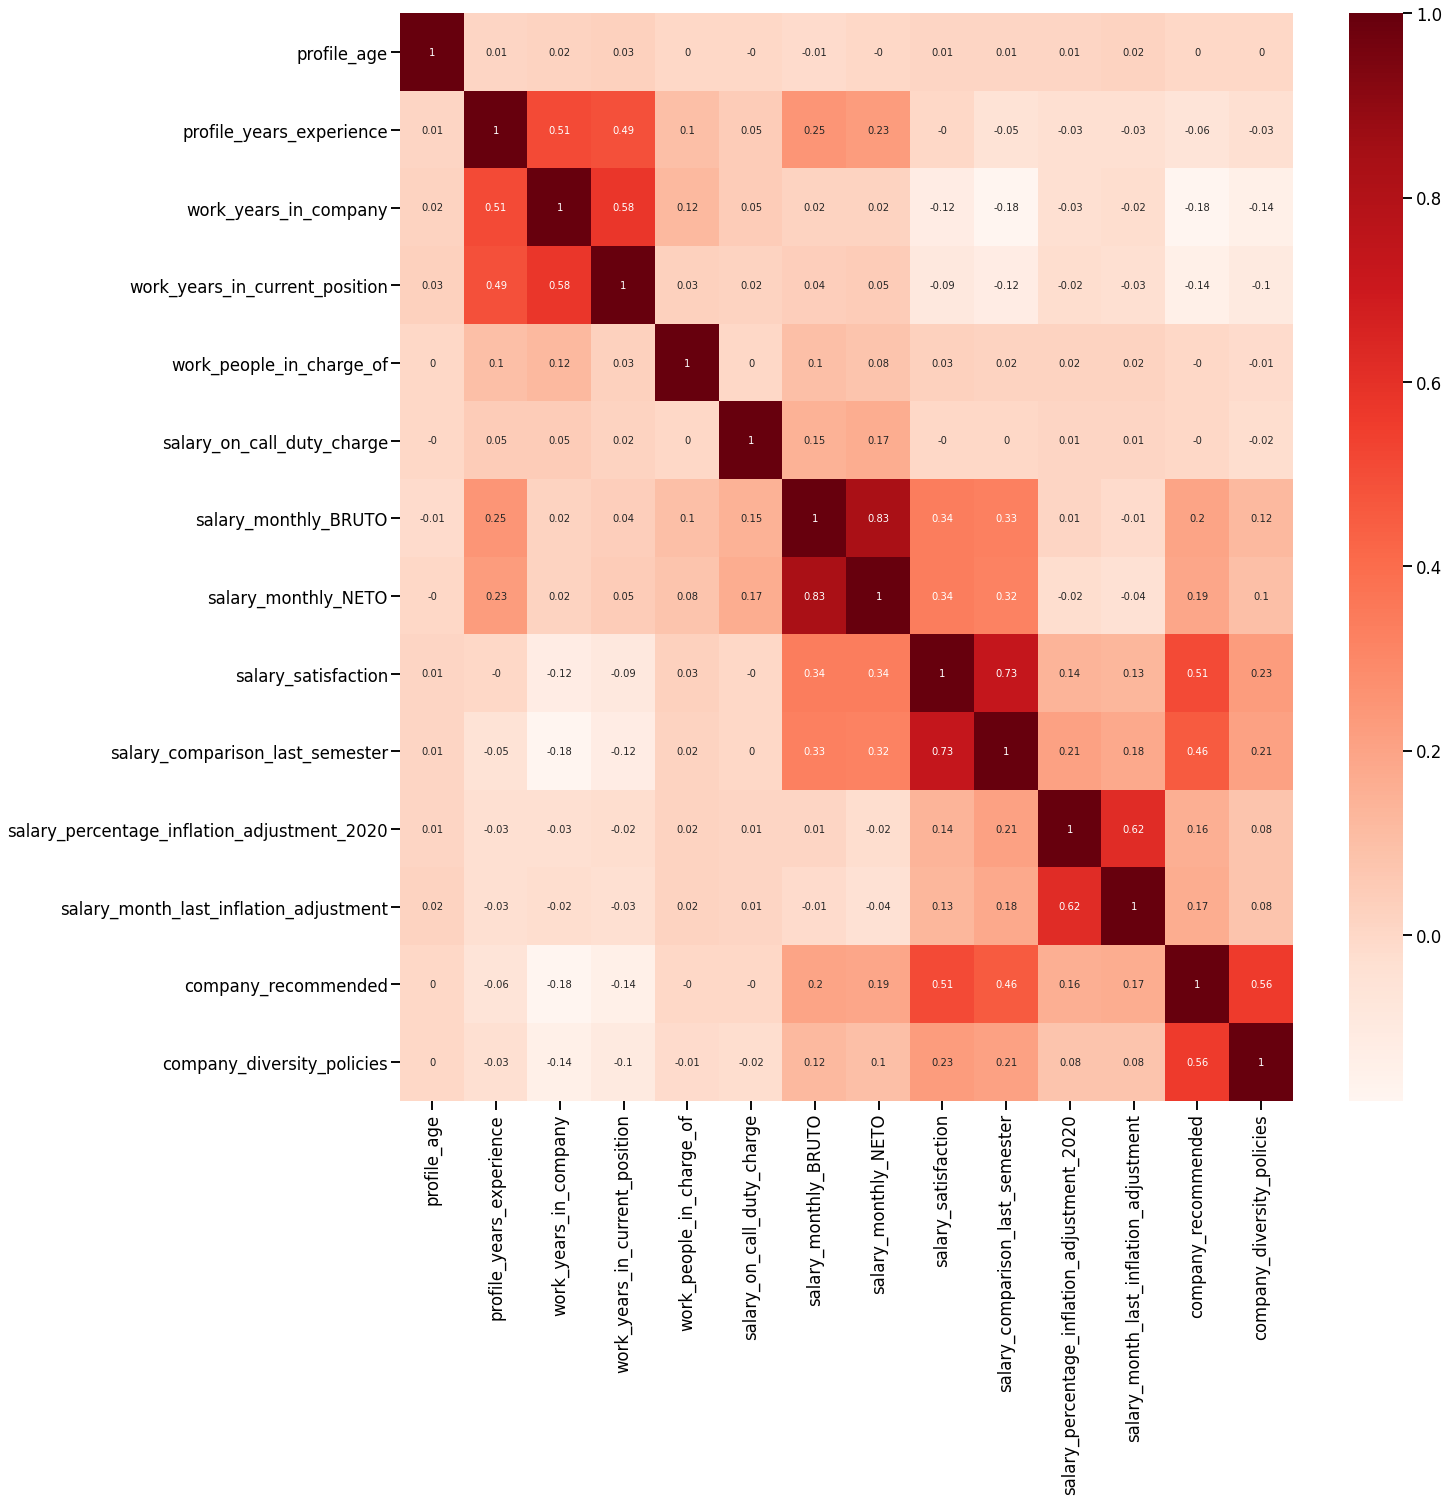

In [7]:
correlations = df.corr().round(2)

#Using Pearson Correlation
plt.figure(figsize=(20,20))

seaborn.heatmap(correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

# De lo anterior se desprende que hay una alta correralación entre el salario bruto y el neto lo cual nos permite omitir alguna de las dos columnas


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

<span style='background:#e6b530'> Limpieza de datos  </span>


Identificamos las columnas que tienen faltantes de datos y las mangintudes de los faltantes

In [8]:
cell_color = 'black'
set_background(cell_color)
df.isna().sum()

profile_gender                                     0
profile_age                                        0
work_country                                       0
work_province                                      0
profile_years_experience                           0
work_years_in_company                              0
work_years_in_current_position                     0
work_people_in_charge_of                           0
profile_studies_level                              0
profile_studies_level_state                        0
profile_career                                   299
profile_university                               534
profile_specialization_courses                     0
profile_open_source_contributions                  0
profile_programming_as_hobby                       0
work_role                                          0
tools_platform                                     2
tools_programming_languages                        1
tools_frameworks                              

<span style='background:black'>Se detecta que existen  filas  las cuales tienen el campo salary_monthly_NETO sin información (212 filas en esta condición)</span>

In [9]:
set_background(cell_color)
cantidad_salary_monthly_NETO_nulos = df.salary_monthly_NETO.isna().sum()
cantidad_filas_df = df.shape[0]
print (" Total de filas df: {0}, total de filas donde salary_monthly_NETO no tiene valoes: {1} , % {2} ".format(cantidad_filas_df, cantidad_salary_monthly_NETO_nulos ,   cantidad_salary_monthly_NETO_nulos / cantidad_filas_df * 100 ))

 Total de filas df: 6095, total de filas donde salary_monthly_NETO no tiene valoes: 212 , % 3.4782608695652173 



En el data set se encontro 'Ninguno' como lenguaje de programación. 
Eliminamos las filas que tienen como lenguaje a 'Ninguno'

In [10]:
df = df[df['tools_programming_languages'] != 'Ninguno']

In [11]:
# Obtenemos todos los roles informados
df['work_role'].unique()

array(['Developer', 'SysAdmin / DevOps / SRE', 'Manager / Director',
       'Technical Leader', 'Data Scientist / Data Engineer', 'DBA',
       'QA / Tester', 'Architect', 'Product Manager', 'Designer',
       'BI Analyst / Data Analyst', 'Middleware', 'VP / C-Level',
       'Storage / Backup', 'Infosec', 'HelpDesk', 'Networking',
       'Jefe de infraestructura ', 'Scrum Master', 'Project Manager',
       'Consultant', 'Business Analyst', 'Team leader',
       'Microinformatica', 'Technical Writer',
       'Implementadora de software ', 'Desarrollador BI',
       'Martech Specialist', 'Software Configuration Management',
       'Maquetador/Diseño UI', 'Service manager', 'Release Manager',
       'Access Management Analyst', 'DevOps Cloud Engineer', 'tecnico',
       'Recruiter / HR', 'Data Visualization',
       'Implementador de Software', 'back end', 'Software Engineer',
       'NLP', 'NOC', 'QA automation Technical Leader', 'SOC', 'Cto',
       'Instalación, puesta en marcha y serv

In [12]:
# Se puede observar que existen roles que no hacen desarrollo. Como lo que se busca
# es cuales son los lenguajes mejores pagos, se asume que se apunta a roles 
# vincualados al desarrollo / calidad / devops y NO a roles de gestión, RRHH

# Vamos a elimiar todos los roles que tenga un string que contenga:
# Manager, Product Owner,, Administrativo, Construcción y atendedor , 
# Repartido, Responsable, Coordinador, Encargado, Empleado bancario, Gerente, biomedicina, Jefe, Executive, Project Lead, Gastronomía


result = df['work_role'].str.contains('Scrum Master|Manager|Product Owner|Administrativ|Repartidor|Responsable|Dirección|oordinador|Encargado|bancario|biomedicina|Coach|Jefe|jefe|Executive|Resiliencia|Gastronomía|Project|Maxirest|cadete|director|Finance|Cto|Writer|VP' )

#~result

df[result]['work_role'].count()


550

In [13]:
#df[result].to_csv('eliminados.csv'

In [14]:
#Controlamos que las filas se hayan elimandos del data frame. Para eso
# verificamos que el tamñano del data frame resultante sea menor al df
# original
df = df[~result ]
df.shape

(5219, 48)

In [15]:

df['work_contract_type'].unique()

array(['Full-Time', 'Freelance', 'Part-Time',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Remoto (empresa de otro país)'], dtype=object)

In [16]:
#Buscamos y calculmanos la cantidad de filas tipo part-time
partime_index = df['work_contract_type'].str.contains('Part-Time')
partime_index.sum()

289

In [17]:
#Eliminamos los part-time puesto que no sabe si el partime es medio dia, 2 horas, 3 horas ....

df = df[~partime_index ]
df.shape

(4930, 48)

<span style='background:#e6b530'> Corregimos las filas que no tiene salario NETO. Para ello tomamos el bruto y lo multiplicamos x 0,83 </span>

In [18]:
#Para las filas que no tienen neto, calculamos el neto haciendo BRUTO * 0.83
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 0.83 if math.isnan(x.salary_monthly_NETO)   else x['salary_monthly_NETO'], axis=1)    

<span style='background:#e6b530'>Controlamos que no existan más filas con NETO sin valores (debe ser 0 la cantidad de filas que no tienen salario neto) </span>

In [19]:
#C
set_background(cell_color)
df['salary_monthly_NETO'].isna().sum()

0

<span style='background:#e6b530'>Vemos cuantos casos tenemos de salarios Netos mayores a salarios Brutos</span>

In [20]:
set_background(cell_color)
df[df.salary_monthly_BRUTO < df.salary_monthly_NETO ].shape[0]

122

<span style='background:#e6b530'>Vamos a poner como bruto al neto, y luego recalculamos en neto (no se contempla descuento de ganancias, descontamos un 17% entre jub, obra soc y otros)
</span>


In [21]:
set_background(cell_color)
df['recalculate_salary'] = df.apply(lambda x:  x['salary_monthly_NETO'] >  x['salary_monthly_BRUTO'], axis=1)    

df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_NETO'] if x['recalculate_salary']   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 0.83 if x['recalculate_salary']   else x['salary_monthly_NETO'], axis=1)    

<span style='background:black'>Verificamos que no existan mas salarios netos matores a salarios brutos </span>

In [22]:
set_background(cell_color)
df[df.salary_monthly_BRUTO < df.salary_monthly_NETO ].shape[0]

0

<span style='background:black'>Muchos sueldos están expresados en unidades de mil. Por ejemplo para 82000, ponen 82. Vamos a convertir esos sueldos al formato del resto </span>
<span style='background:black'>Normalizamos el formato de los sueldos a unidades de mil (82 --> 82000) </span>

In [23]:
set_background(cell_color)

filtro_dolar = 'Mi sueldo está dolarizado'
#Filtrar que no sean en dolares
limit = 1000
df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 1000 if ((x['salary_monthly_BRUTO'] < limit) & (x['salary_monthly_BRUTO'] == filtro_dolar ) )  else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_NETO'] * 1000 if ((x['salary_monthly_NETO'] < limit ) & (x['salary_monthly_BRUTO'] == filtro_dolar ) )  else x['salary_monthly_NETO'], axis=1)

In [24]:
set_background(cell_color)
limit_us = 10000


df_salary_to_convert = ((df.salary_monthly_NETO <= limit_us) & (df.salary_in_usd == filtro_dolar) )

print(f"Cantidad de salarios <= {limit_us} : {df_salary_to_convert.sum()}, % respecto al total {df_salary_to_convert.sum()  / df.shape[0] }")

Cantidad de salarios <= 10000 : 25, % respecto al total 0.005070993914807302


In [25]:
df[df_salary_to_convert][['salary_monthly_NETO','salary_in_usd']]

,salary_monthly_NETO,salary_in_usd
224,5000.0,Mi sueldo está dolarizado
246,60.0,Mi sueldo está dolarizado
844,110.0,Mi sueldo está dolarizado
910,160.0,Mi sueldo está dolarizado
924,6000.0,Mi sueldo está dolarizado
982,185.0,Mi sueldo está dolarizado
1425,260.0,Mi sueldo está dolarizado
1701,307.1,Mi sueldo está dolarizado
1820,145.0,Mi sueldo está dolarizado
2212,125.0,Mi sueldo está dolarizado


<span style='background:black'>
Convertimos a $ los sueldos dolarizados. Tomamos como fuente el valor blue reportado en https://www.cotizacion-dolar.com.ar/dolar-blue-historico-2020.php . Se toma fecha 25/08/2020, valor compra
</span>

In [26]:
set_background(cell_color)
valor_dolar = 133


df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * valor_dolar if (( x['salary_monthly_BRUTO']  < limit_us) & (x['salary_in_usd'] == filtro_dolar ))   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO']  = df.apply(lambda x: x['salary_monthly_NETO']  * valor_dolar if (( x['salary_monthly_NETO']  < limit_us) & (x['salary_in_usd'] == filtro_dolar ))  else x['salary_monthly_NETO'], axis=1)

In [27]:
set_background(cell_color)

#df_salary_to_convert = ((df.salary_monthly_NETO <= limit_us) & (df.salary_in_usd == filtro_dolar) )
(df.salary_monthly_BRUTO <= limit_us).sum()
print(f"Cantidad de salarios <= {limit_us} : {((df.salary_monthly_BRUTO <= limit_us) &  (df.salary_in_usd == filtro_dolar)).sum().round(2)}, % respecto al total {(df_salary_to_convert.sum()  / df.shape[0]).round(3) }")

Cantidad de salarios <= 10000 : 1, % respecto al total 0.005


Redondear VALORES!!!!

In [28]:
set_background(cell_color)
index_to_drop = df[df.salary_monthly_NETO <= 10000].index

In [29]:
set_background(cell_color)
df.drop(index_to_drop, inplace = True)

In [30]:
set_background(cell_color)
print("Cantidad de salarios <= 10000 : {0}, % respecto al total {1}".format((df.salary_monthly_NETO <= 10000).sum() ,(df.salary_monthly_NETO <= 1000).sum()  / df.shape[0] ))

Cantidad de salarios <= 10000 : 0, % respecto al total 0.0


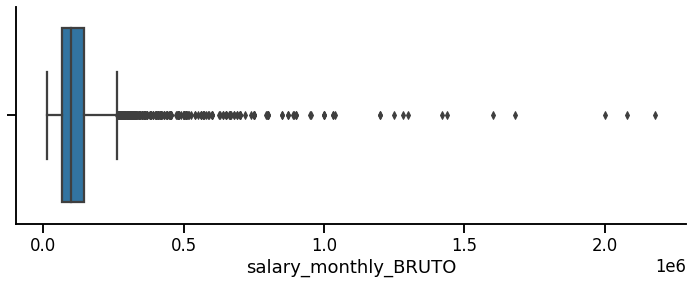

In [31]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df['salary_monthly_BRUTO'])
seaborn.despine()

In [32]:
df_lang_clean_group_by_programming_language = df.groupby(['work_role'] , as_index=False).agg({'salary_monthly_BRUTO': ['mean', 'min', 'max' , 'count']})
df_lang_clean_group_by_programming_language

work_role  ... salary_monthly_BRUTO
                                                        ...                count
0                                   buyer / commercial  ...                    1
1                                                    ,  ...                    1
2                        AV Technical Leader - Support  ...                    1
3                            Access Management Analyst  ...                    1
4                                                Admin  ...                    1
..                                                 ...  ...                  ...
225                                  technical analyst  ...                    1
226                                            tecnico  ...                    1
227                                todos los de arriba  ...                    1
228  trabajo como desarrollador back, pero también ...  ...                    1
229                                  técnico reparador  ...                    1

[230 rows x 5 columns]

In [33]:
#

df_lang_clean_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'count')],ascending = False)[:30]




work_role salary_monthly_BRUTO  ...                 
                                                    mean  ...        max count
59                        Developer        126777.195344  ...  2180000.0  2165
180         SysAdmin / DevOps / SRE        131178.631862  ...  1680000.0   596
188                Technical Leader        198400.344059  ...  2080000.0   372
136                     QA / Tester        105379.597545  ...  1033000.0   220
26                        Architect        198119.072727  ...  1439100.0   165
80                         HelpDesk         63173.352789  ...   508252.0   147
50   Data Scientist / Data Engineer        163330.423077  ...  1200000.0   130
32        BI Analyst / Data Analyst         95615.682823  ...   271802.0   124
42                       Consultant        100868.535254  ...   700000.0   118
119                      Networking        100947.698611  ...  1200000.0   108
35                 Business Analyst         99971.726915  ...   250000.0    94
201                              UX         98306.304348  ...   392000.0    69
93                          Infosec        125442.611940  ...   312100.0    67
46                              DBA        164170.020000  ...  1250000.0    50
55                         Designer         65941.540541  ...   190000.0    37
143                  Recruiter / HR         98555.718750  ...   200000.0    32
112                      Middleware        117280.952381  ...   210000.0    21
148               Sales / Pre-Sales        176421.052632  ...  1000000.0    19
178                Storage / Backup         96222.222222  ...   145000.0     9
116                             NLP        100233.000000  ...   118337.0     6
167               Software Engineer        171000.000000  ...   250000.0     5
9                Analista Funcional         75525.000000  ...   101000.0     4
71               Functional Analyst         99333.333333  ...   133000.0     3
56                           DevOps        195666.666667  ...   325000.0     3
40                   Cloud Engineer        107500.000000  ...   115000.0     2
70                        Funcional         65500.000000  ...    76000.0     2
34                  Blockchain Team        137000.000000  ...   137000.0     2
17               Analista funcional         64500.000000  ...    84000.0     2
29                          Auditor         87500.000000  ...   110000.0     2
169               Software engineer         93800.000000  ...   112600.0     2

[30 rows x 5 columns]

In [34]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO' ,'salary_monthly_BRUTO', 'work_role']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [35]:
df.tools_programming_languages[:3]

1                             HTML, Javascript, Python
3    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4               CSS, HTML, Javascript, SQL, TypeScript
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

Filtrando por edad:

In [36]:
rows_to_delete = df[(df.profile_age < 19) | (df.profile_age > 70 ) ].index
df_age_cleaned = df.drop(rows_to_delete)

Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es tools_programming_languages. Sus valores son strings con los lenguajes seleccionados separados por comas.

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.


In [37]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 



In [38]:
# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.

def duplicate_rows(df, relevant_columns):

    df_lang = df.cured_programming_languages\
        .apply(pd.Series).stack()\
        .reset_index(level=-1, drop=True).to_frame()\
        .join(df[relevant_columns])\
        .rename(columns={0: 'programming_language'})
    # Horrible programming style! But a lot of data science code can be written with
    # as concatenations of functions (pipelines), and there's no elegant way of
    # doing that on Python.
    
    return df_lang


In [39]:
df_lang = duplicate_rows(df, relevant_columns)
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."


In [83]:
cloumns_part_2 = relevant_columns + ['profile_studies_level_state','profile_studies_level', 'profile_years_experience', 'work_years_in_company' , 'work_years_in_current_position' , 'work_people_in_charge_of' , 'profile_gender' , 'salary_percentage_inflation_adjustment_2020' , 'work_people_in_charge_of']
df_lang_part_2 = duplicate_rows(df, cloumns_part_2)
df_lang_part_2[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020,work_people_in_charge_of
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0,4
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0,4
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0,4
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0,5
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0,5


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [41]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2125
1,sql,1787
2,html,1549
3,python,1237
4,java,1198
5,css,1069
6,bash/shell,861
7,php,690
8,typescript,688
9,.net,672


In [42]:
total_lenguajes = language_count['frequency'].sum()


language_count['porc'] = language_count['frequency'] / total_lenguajes
language_count[:17]['porc'].sum().round(2)

0.93

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [43]:
# Buscamos los lenguajes que formen el 90% de las muestras


index = 1 
porc_target = 0.91
while language_count[:index]['porc'].sum()  <= porc_target:
    print(" Indice :" , index , " Total %" ,  language_count[:index]['porc'].sum() , end = "")
    index = index + 1



 Indice : 1  Total % 0.14420466883821934 Indice : 2  Total % 0.26547231270358307 Indice : 3  Total % 0.37058903365906626 Indice : 4  Total % 0.45453311617806735 Indice : 5  Total % 0.5358306188925082 Indice : 6  Total % 0.6083740499457112 Indice : 7  Total % 0.6668023887079262 Indice : 8  Total % 0.7136264929424538 Indice : 9  Total % 0.760314875135722 Indice : 10  Total % 0.8059174809989142 Indice : 11  Total % 0.8478555917480999 Indice : 12  Total % 0.865228013029316 Indice : 13  Total % 0.879071661237785 Indice : 14  Total % 0.8927117263843648 Indice : 15  Total % 0.9055374592833876


Indicar que se toman los lenguajes más representativos en base al punto de inflexión que se observa en el gráfico

 Hallazgo interesante: Tanto visualmente como porcentualmente, se llega a la misma 
conclusión que es tomar los 15 lenguajes más  frecuentes.

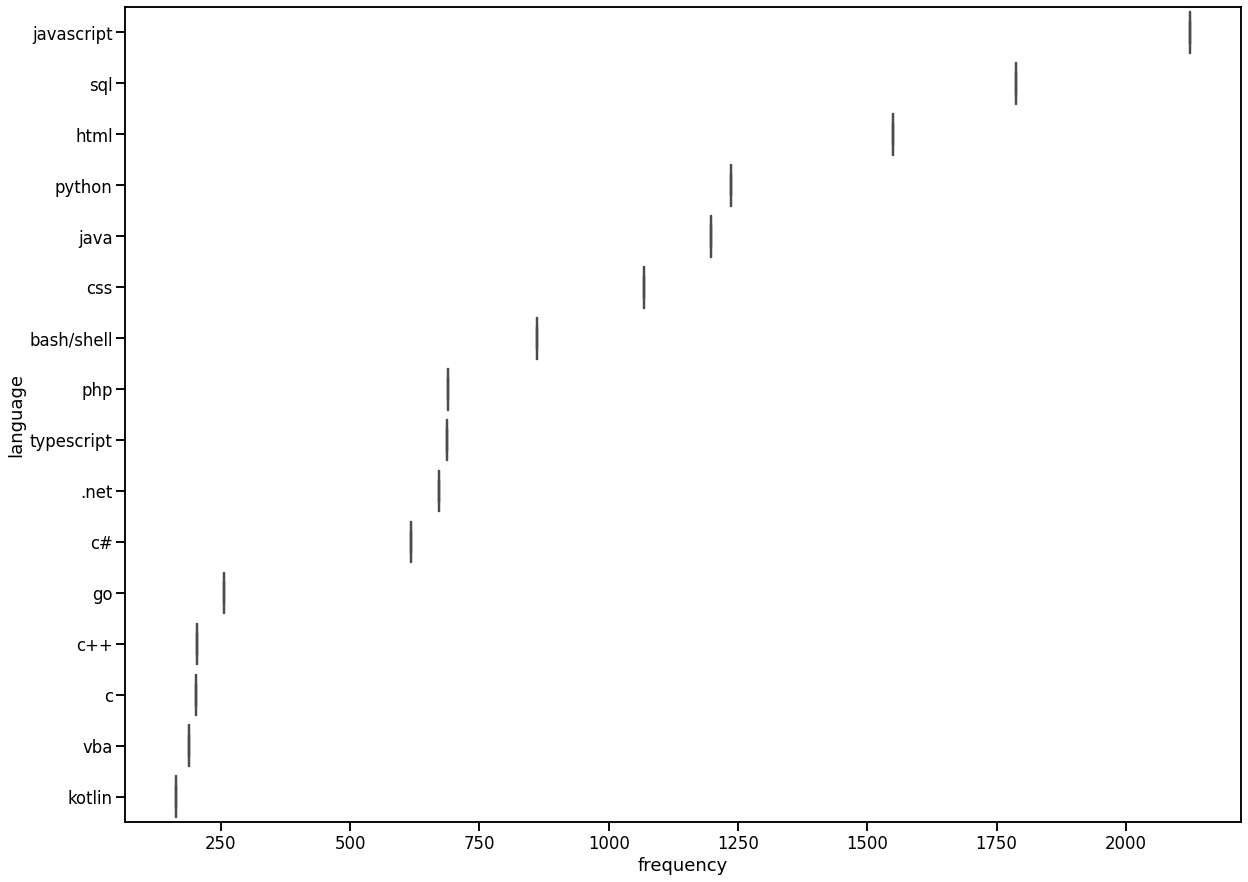

In [44]:
plt.figure(figsize=(20, 15))
seaborn.boxplot(data=language_count[:index], y=language_count.language[:index], x=language_count.frequency,
                 color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [45]:
language_count[:index]

,language,frequency,porc
0,javascript,2125,0.144205
1,sql,1787,0.121268
2,html,1549,0.105117
3,python,1237,0.083944
4,java,1198,0.081298
5,css,1069,0.072543
6,bash/shell,861,0.058428
7,php,690,0.046824
8,typescript,688,0.046688
9,.net,672,0.045603


In [46]:
interesting_languages  =language_count[:index]['language'].values
interesting_languages

array(['javascript', 'sql', 'html', 'python', 'java', 'css', 'bash/shell',
       'php', 'typescript', '.net', 'c#', 'go', 'c++', 'c', 'vba',
       'kotlin'], dtype=object)

In [47]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
#interesting_languages = ["python"]

def filter_intresting_languages(df_lang,intresting_languages):
    
    filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]

    return filtered_df_lang

In [48]:
filtered_df_lang = filter_intresting_languages(df_lang,interesting_languages)
filtered_df_lang[:5]


,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."


In [49]:
#Este data frame se prepara para la parte el Ejercicio 2
filtered_df_lang_part_2 = filter_intresting_languages(df_lang_part_2,interesting_languages)
filtered_df_lang_part_2[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0


Sacando las métricas útiles para esta distribución:

In [50]:
#Media general
df_means =df_lang.groupby(['programming_language']).agg({'salary_monthly_BRUTO': ['mean']}).reset_index()
#dejamos solo 2 decimales
df_means.describe().round(2)

,salary_monthly_BRUTO
,mean
count,188.00
mean,128496.94
std,99905.31
min,12000.00
25%,77750.00
50%,106800.50
75%,139284.35
max,720000.00


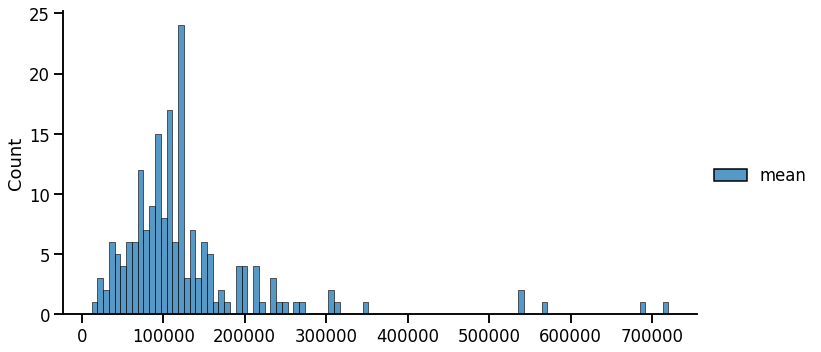

In [51]:
#tamaño de bins = # de barritas
seaborn.displot(df_means['salary_monthly_BRUTO'], aspect=2, bins = 100)
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')


In [52]:
filtered_df_lang_group_by_programming_language = filtered_df_lang.groupby(['programming_language'] , as_index=False).agg({'salary_monthly_BRUTO': ['mean', 'min', 'max' , 'count']})
filtered_df_lang_group_by_programming_language
   

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
0                  .net        119201.820074  17000.0  1033000.0   672
1            bash/shell        151782.937805  17000.0  2080000.0   861
2                     c        152978.267463  12000.0  2080000.0   201
3                    c#        120384.308948  12000.0  1680000.0   618
4                   c++        138956.638529  12000.0  1680000.0   204
5                   css        122794.197081  13300.0  2080000.0  1069
6                    go        198974.932500  40000.0  1600000.0   256
7                  html        121947.781407  13300.0  2080000.0  1549
8                  java        136201.735910  20000.0  2180000.0  1198
9            javascript        134410.403995  13300.0  2180000.0  2125
10               kotlin        189830.170245  32500.0  2180000.0   163
11                  php        119624.158797  17000.0   798000.0   690
12               python        147169.735352  17000.0  1680000.0  1237
13                  sql        123227.817711  20000.0  2180000.0  1787
14           typescript        154638.982238  17000.0  2180000.0   688
15                  vba        102829.005661  26890.0   750000.0   189

In [53]:
filtered_df_lang_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'count')],ascending = False)[:]

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
9            javascript        134410.403995  13300.0  2180000.0  2125
13                  sql        123227.817711  20000.0  2180000.0  1787
7                  html        121947.781407  13300.0  2080000.0  1549
12               python        147169.735352  17000.0  1680000.0  1237
8                  java        136201.735910  20000.0  2180000.0  1198
5                   css        122794.197081  13300.0  2080000.0  1069
1            bash/shell        151782.937805  17000.0  2080000.0   861
11                  php        119624.158797  17000.0   798000.0   690
14           typescript        154638.982238  17000.0  2180000.0   688
0                  .net        119201.820074  17000.0  1033000.0   672
3                    c#        120384.308948  12000.0  1680000.0   618
6                    go        198974.932500  40000.0  1600000.0   256
4                   c++        138956.638529  12000.0  1680000.0   204
2                     c        152978.267463  12000.0  2080000.0   201
15                  vba        102829.005661  26890.0   750000.0   189
10               kotlin        189830.170245  32500.0  2180000.0   163

In [54]:
filtered_df_lang_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'mean')],ascending = False)[:]

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
6                    go        198974.932500  40000.0  1600000.0   256
10               kotlin        189830.170245  32500.0  2180000.0   163
14           typescript        154638.982238  17000.0  2180000.0   688
2                     c        152978.267463  12000.0  2080000.0   201
1            bash/shell        151782.937805  17000.0  2080000.0   861
12               python        147169.735352  17000.0  1680000.0  1237
4                   c++        138956.638529  12000.0  1680000.0   204
8                  java        136201.735910  20000.0  2180000.0  1198
9            javascript        134410.403995  13300.0  2180000.0  2125
13                  sql        123227.817711  20000.0  2180000.0  1787
5                   css        122794.197081  13300.0  2080000.0  1069
7                  html        121947.781407  13300.0  2080000.0  1549
3                    c#        120384.308948  12000.0  1680000.0   618
11                  php        119624.158797  17000.0   798000.0   690
0                  .net        119201.820074  17000.0  1033000.0   672
15                  vba        102829.005661  26890.0   750000.0   189

In [55]:
filtered_df_lang_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'max')],ascending = False)[:]

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
8                  java        136201.735910  20000.0  2180000.0  1198
9            javascript        134410.403995  13300.0  2180000.0  2125
10               kotlin        189830.170245  32500.0  2180000.0   163
13                  sql        123227.817711  20000.0  2180000.0  1787
14           typescript        154638.982238  17000.0  2180000.0   688
1            bash/shell        151782.937805  17000.0  2080000.0   861
2                     c        152978.267463  12000.0  2080000.0   201
5                   css        122794.197081  13300.0  2080000.0  1069
7                  html        121947.781407  13300.0  2080000.0  1549
3                    c#        120384.308948  12000.0  1680000.0   618
4                   c++        138956.638529  12000.0  1680000.0   204
12               python        147169.735352  17000.0  1680000.0  1237
6                    go        198974.932500  40000.0  1600000.0   256
0                  .net        119201.820074  17000.0  1033000.0   672
11                  php        119624.158797  17000.0   798000.0   690
15                  vba        102829.005661  26890.0   750000.0   189

In [56]:
#Esta funcion devuelve 3 dataframes 
# outliers_inferiores: Son los valores que perforan el limiter inferior 
# filtered: Son los valores que quedan dentro del rango RIC
# outliers_superiores: Son los valores que perforan el limiete superior

def remove_outliers (laguange,filtered_df_lang): 
    
    result = filtered_df_lang[filtered_df_lang.programming_language == laguange]['salary_monthly_BRUTO'].describe()
    RIC = result[6] - result[4]
    Ls = result[6] + RIC * 1.5
    Li = result[4] - RIC * 1.5

    filtered = filtered_df_lang[(filtered_df_lang.programming_language == laguange ) &  (filtered_df_lang.salary_monthly_BRUTO <= Ls) &  (filtered_df_lang.salary_monthly_BRUTO >= Li) ] 
    outliers_superiores = filtered_df_lang[(filtered_df_lang.programming_language == laguange ) &  (filtered_df_lang.salary_monthly_BRUTO >= Ls)] 
    outliers_inferiores = filtered_df_lang[(filtered_df_lang.programming_language == laguange ) &  (filtered_df_lang.salary_monthly_BRUTO <= Li)] 
    
    #print ("Language: {0} RIC {1} Ls {2} Li {3}".format(laguange,RIC,Ls,Li))
    return (outliers_inferiores,filtered,outliers_inferiores)

In [57]:
# Esta funcion crea un data frame con todos los leguajes especificados en interesting_languages
# en el data frame filtered_df_lang. El nuevo data frame generado, tiene eliminados los outliers inferiores y superiores


def create_df_no_outliers_interesting_languages(interesting_languages , filtered_df_lang):
    filtered_data_frames = []

    for language in interesting_languages:
        _,tmp,_ = remove_outliers (language, filtered_df_lang)
        filtered_data_frames.append(tmp)

    tmp = pd.concat(filtered_data_frames, axis=0)
    
    return tmp


In [58]:
df_no_outliers_interesting_languages = create_df_no_outliers_interesting_languages(interesting_languages , filtered_df_lang)

In [59]:
# Este dataframe se prepara para el Ejercicio 2
df_no_outliers_interesting_languages_part_2 = create_df_no_outliers_interesting_languages(interesting_languages , filtered_df_lang_part_2)

In [60]:
df_no_outliers_interesting_languages.shape[0]

12560

In [61]:
df_no_outliers_interesting_languages.describe()

,salary_monthly_NETO,salary_monthly_BRUTO
count,12560.000000,12560.000000
mean,83907.448674,107833.238144
std,38182.272295,53474.795039
min,10700.000000,12000.000000
25%,56000.000000,67000.000000
50%,79465.000000,98990.000000
75%,103000.000000,140000.000000
max,300000.000000,360000.000000


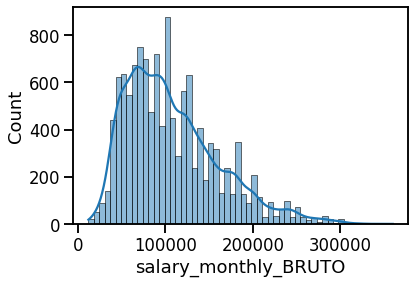

In [62]:
seaborn.histplot(df_no_outliers_interesting_languages['salary_monthly_BRUTO'] , kde=True)

In [63]:
df_no_outliers_interesting_languages_group_by_programming_language = df_no_outliers_interesting_languages.groupby(['programming_language'] , as_index=False).agg({'salary_monthly_BRUTO': ['mean', 'min', 'max' , 'count']})
df_no_outliers_interesting_languages_group_by_programming_language

programming_language salary_monthly_BRUTO                         
                                        mean      min       max count
0                  .net        100446.946260  17000.0  234000.0   631
1            bash/shell        120068.243095  17000.0  303689.0   798
2                     c        110625.172609  12000.0  300000.0   184
3                    c#         98141.034661  12000.0  230000.0   575
4                   c++         99048.953262  12000.0  268400.0   187
5                   css         96831.528970  13300.0  246000.0   990
6                    go        157228.713074  40000.0  345000.0   231
7                  html         96510.308188  13300.0  242000.0  1429
8                  java        120147.081622  20000.0  297000.0  1147
9            javascript        106038.192185  13300.0  270000.0  1959
10               kotlin        154708.656250  32500.0  360000.0   152
11                  php         95337.898817  17000.0  240000.0   634
12               python        121138.257539  17000.0  303689.0  1150
13                  sql        101660.433133  20000.0  250000.0  1682
14           typescript        116853.080603  17000.0  300000.0   630
15                  vba         90429.182707  26890.0  200000.0   181

In [64]:
df_no_outliers_interesting_languages_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'count')],ascending = False)[:]

programming_language salary_monthly_BRUTO                         
                                        mean      min       max count
9            javascript        106038.192185  13300.0  270000.0  1959
13                  sql        101660.433133  20000.0  250000.0  1682
7                  html         96510.308188  13300.0  242000.0  1429
12               python        121138.257539  17000.0  303689.0  1150
8                  java        120147.081622  20000.0  297000.0  1147
5                   css         96831.528970  13300.0  246000.0   990
1            bash/shell        120068.243095  17000.0  303689.0   798
11                  php         95337.898817  17000.0  240000.0   634
0                  .net        100446.946260  17000.0  234000.0   631
14           typescript        116853.080603  17000.0  300000.0   630
3                    c#         98141.034661  12000.0  230000.0   575
6                    go        157228.713074  40000.0  345000.0   231
4                   c++         99048.953262  12000.0  268400.0   187
2                     c        110625.172609  12000.0  300000.0   184
15                  vba         90429.182707  26890.0  200000.0   181
10               kotlin        154708.656250  32500.0  360000.0   152

In [65]:
df_no_outliers_interesting_languages_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'mean')],ascending = False)[:]

programming_language salary_monthly_BRUTO                         
                                        mean      min       max count
6                    go        157228.713074  40000.0  345000.0   231
10               kotlin        154708.656250  32500.0  360000.0   152
12               python        121138.257539  17000.0  303689.0  1150
8                  java        120147.081622  20000.0  297000.0  1147
1            bash/shell        120068.243095  17000.0  303689.0   798
14           typescript        116853.080603  17000.0  300000.0   630
2                     c        110625.172609  12000.0  300000.0   184
9            javascript        106038.192185  13300.0  270000.0  1959
13                  sql        101660.433133  20000.0  250000.0  1682
0                  .net        100446.946260  17000.0  234000.0   631
4                   c++         99048.953262  12000.0  268400.0   187
3                    c#         98141.034661  12000.0  230000.0   575
5                   css         96831.528970  13300.0  246000.0   990
7                  html         96510.308188  13300.0  242000.0  1429
11                  php         95337.898817  17000.0  240000.0   634
15                  vba         90429.182707  26890.0  200000.0   181

In [66]:
df_no_outliers_interesting_languages_group_by_programming_language.columns = [''.join(col).strip() for col in df_no_outliers_interesting_languages_group_by_programming_language.columns.values]

df_no_outliers_interesting_languages_group_by_programming_language['porc'] = 100 * df_no_outliers_interesting_languages_group_by_programming_language['salary_monthly_BRUTOcount'] / df_no_outliers_interesting_languages_group_by_programming_language['salary_monthly_BRUTOcount'].sum()

df_no_outliers_interesting_languages_group_by_programming_language

,programming_language,salary_monthly_BRUTOmean,salary_monthly_BRUTOmin,salary_monthly_BRUTOmax,salary_monthly_BRUTOcount,proc
0,.net,100446.946260,17000.0,234000.0,631,5.023885
1,bash/shell,120068.243095,17000.0,303689.0,798,6.353503
2,c,110625.172609,12000.0,300000.0,184,1.464968
3,c#,98141.034661,12000.0,230000.0,575,4.578025
4,c++,99048.953262,12000.0,268400.0,187,1.488854
5,css,96831.528970,13300.0,246000.0,990,7.882166
6,go,157228.713074,40000.0,345000.0,231,1.839172
7,html,96510.308188,13300.0,242000.0,1429,11.377389
8,java,120147.081622,20000.0,297000.0,1147,9.132166
9,javascript,106038.192185,13300.0,270000.0,1959,15.597134


In [ ]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))



seaborn.boxplot(ax = axes[0] , x="programming_language", y="salary_monthly_BRUTO", data=df_no_outliers_interesting_languages)
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[0].set_xlabel('Lenguajes')
axes[0].set_ylabel('Salario Bruto')
axes[0].set_title('Salarios Brutos Promedio')


seaborn.barplot(ax = axes[1] , x="programming_language", y="salary_monthly_BRUTOcount", data=df_no_outliers_interesting_languages_group_by_programming_language)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)
axes[1].set_xlabel('Lenguajes')
axes[1].set_ylabel('Cantidad Encuestados')
axes[1].set_title('Popularidad Lenguajes')




graph = seaborn.factorplot(ax = axes[0] , x ='programming_language', y ='porc', kind="bar", data = df_no_outliers_interesting_languages_group_by_programming_language)
graph.set_xticklabels(axes[0].get_xticklabels(),rotation=90)
#graph.set_xlabel('Lenguajes')
#graph.set_ylabel('Cantidad Encuestados')
#graph.set_title('Popularidad Lenguajes')

Medias del salario promedio por lenguaje FILTRADO POR POPULARIDAD:

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

Esto ya lo hicimos mucho en la parte 1

In [68]:
#Vamos a utilizar el data frame f_no_outliers_interesting_languages_part_2
df_no_outliers_interesting_languages_part_2[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0
4,javascript,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,140000.0,Developer,"[css, html, javascript, sql, typescript]",En curso,Universitario,9.0,6.0,6.0,0,Hombre,0.0
5,javascript,"Java, Javascript",44000.0,54000.0,Developer,"[java, javascript]",Incompleto,Terciario,1.0,0.0,0.0,0,Hombre,15.0
6,javascript,Javascript,62400.0,75000.0,Developer,[javascript],Incompleto,Universitario,1.0,1.0,1.0,0,Hombre,8.0


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




In [69]:
#Distribucion y comportamiento
df_no_outliers_interesting_languages_part_2[:1]


,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0


In [70]:
scale_mapper = {"Primario":1, "Secundario":2, "Terciario":3 , "Universitario":4 , "Posgrado":5 , "Doctorado": 6  , "Posdoctorado" : 7  }


df_no_outliers_interesting_languages_part_2["profile_studies_level_ordinal"]  = df_no_outliers_interesting_languages_part_2["profile_studies_level"].replace(scale_mapper)




[Text(0, 0, 'javascript'),
 Text(1, 0, 'sql'),
 Text(2, 0, 'html'),
 Text(3, 0, 'python'),
 Text(4, 0, 'java'),
 Text(5, 0, 'css'),
 Text(6, 0, 'bash/shell'),
 Text(7, 0, 'php'),
 Text(8, 0, 'typescript'),
 Text(9, 0, '.net'),
 Text(10, 0, 'c#'),
 Text(11, 0, 'go'),
 Text(12, 0, 'c++'),
 Text(13, 0, 'c'),
 Text(14, 0, 'vba'),
 Text(15, 0, 'kotlin')]

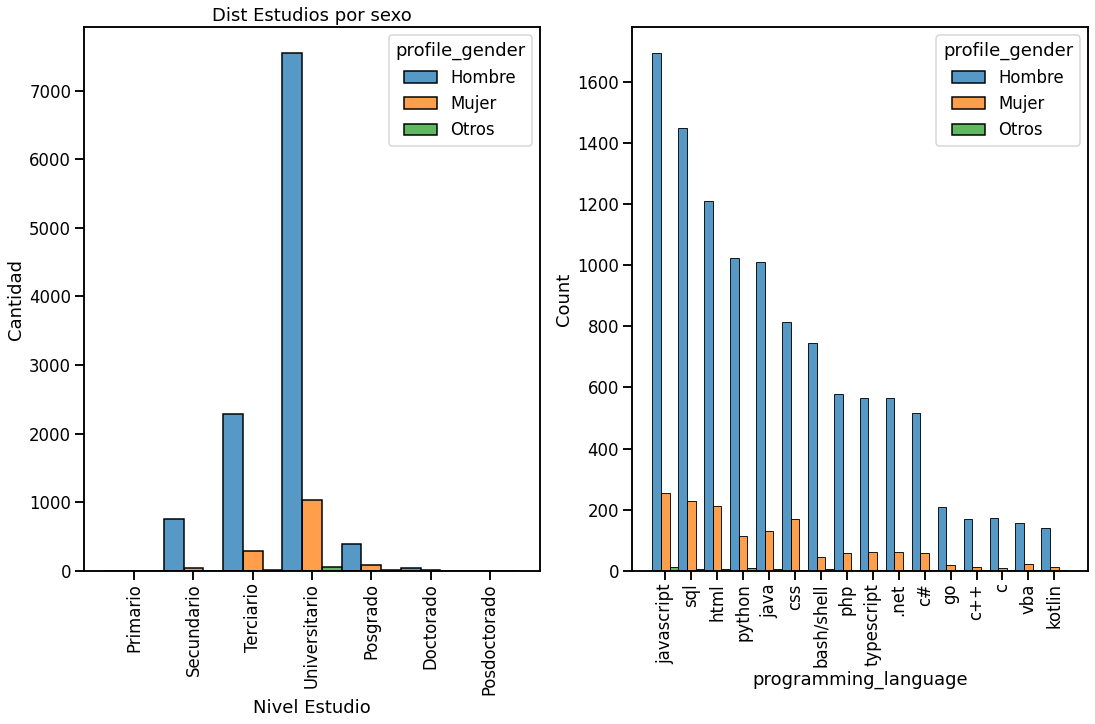

In [71]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.histplot(ax = axes[0], data = df_no_outliers_interesting_languages_part_2.sort_values(by=['profile_studies_level_ordinal']), x="profile_studies_level" , hue="profile_gender"  , multiple="dodge")

seaborn.histplot(ax = axes[1], data = df_no_outliers_interesting_languages_part_2, x="programming_language" , hue="profile_gender"  , multiple="dodge")

axes[0].set_title('Dist Estudios por sexo')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Nivel Estudio')


plt.draw()

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
#axes[0].legend(handles = axes[0].legend.handles() , title = 'Sexo')


axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)



Nuestros datos evidencian que el nivel de estudios elevado de los hombres es mucho mas frecuente y también ka oresencia de las mujeres en la programación de los lengiuajes más populares

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_BRUTO", y="salary_percentage_inflation_adjustment_2020" , hue="profile_studies_level")
# work_people_in_charge_of 
seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="work_people_in_charge_of" , hue="profile_studies_level")

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


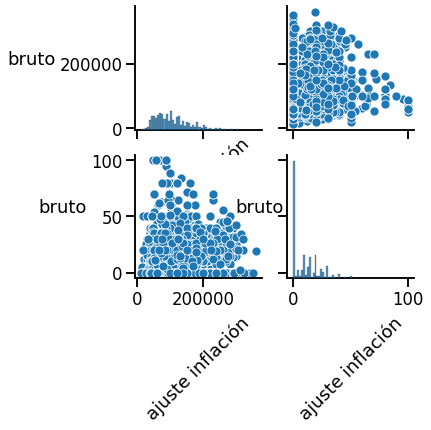

In [87]:
g = seaborn.pairplot(df_no_outliers_interesting_languages_part_2[[ 'salary_monthly_BRUTO', 'salary_percentage_inflation_adjustment_2020' ]])
for axes in g.axes.flat:
    #  axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
    #  axes.set_xlabel(axes.get_xlabel(), rotation=45)
     axes.set_ylabel("bruto", rotation=0, horizontalalignment='right')
     axes.set_xlabel("ajuste inflación", rotation=45)

La consulta la hicimos en la parte 1 y elegimos el bruto, a continuación solo consultamos el factor de correlación:

In [88]:
df_no_outliers_interesting_languages_part_2[ 'salary_monthly_BRUTO'].corr(df_no_outliers_interesting_languages[ 'salary_monthly_NETO']).round(2)

0.95

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [76]:
pob_terciario = df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2['profile_studies_level']== 'Terciario']
pob_universitario = df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2['profile_studies_level']== 'Universitario']


mean_ter = pob_terciario['salary_monthly_NETO'].mean()
median_ter = pob_terciario['salary_monthly_NETO'].median()
std_ter = pob_terciario['salary_monthly_NETO'].std()

mean_uni = pob_universitario['salary_monthly_BRUTO'].mean()
median_uni = pob_universitario['salary_monthly_BRUTO'].median()
std_uni = pob_universitario['salary_monthly_BRUTO'].std()

print ("Estudios Terciarios")
print (f" Media: {mean_ter} , Mediana: {median_ter} , Des: {std_ter} ")

print ("Estudios Universitarios")
print (f" Media: {mean_uni} , Mediana: {median_uni} , Des: {std_uni} ")


Estudios Terciarios
 Media: 77740.42489764385 , Mediana: 71033.0 , Des: 36404.20238485205 
Estudios Universitarios
 Media: 109969.46922987846 , Mediana: 100000.0 , Des: 53835.99261739089 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


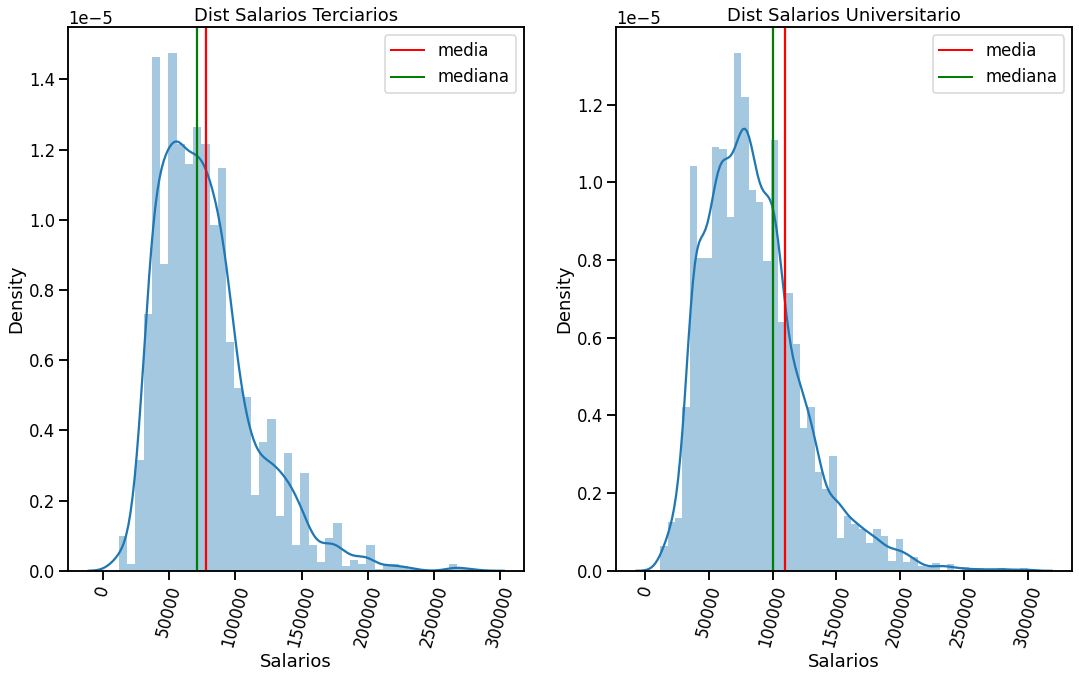

In [77]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))



seaborn.distplot(a = pob_terciario['salary_monthly_NETO'] ,ax = axes[0] )
seaborn.distplot(a = pob_universitario['salary_monthly_NETO'] ,ax = axes[1] )



plt.draw()

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=75)
axes[0].set_xlabel('Salarios')

axes[1].set_xticklabels(axes[0].get_xticklabels(),rotation=75)
axes[1].set_xlabel('Salarios')


#axes[0].set_ylabel('Salario Bruto')
axes[0].set_title('Dist Salarios Terciarios')
axes[0].axvline(mean_ter, color='r', linestyle='-')
axes[0].axvline(median_ter, color='g', linestyle='-')

axes[1].set_title('Dist Salarios Universitario')
axes[1].axvline(mean_uni, color='r', linestyle='-')
axes[1].axvline(median_uni, color='g', linestyle='-')




custom_lines = [Line2D([0], [0], color='red', lw=2),
            Line2D([0], [0], color='green', lw=2)]

axes[0].legend(custom_lines , ['media','mediana'])
axes[1].legend(custom_lines , ['media','mediana'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


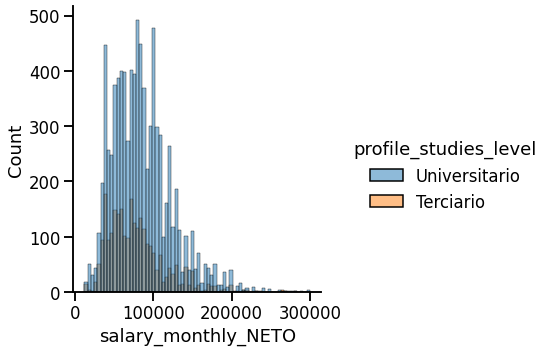

In [78]:


df_uni_ter = df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2['profile_studies_level'].isin(['Universitario' , 'Terciario'])]


seaborn.displot(df_uni_ter , x='salary_monthly_NETO' , hue='profile_studies_level' ,ax = axes[0] )


In [91]:
df_no_outliers_interesting_languages_part_2['work_role']

1                     Developer
3       SysAdmin / DevOps / SRE
4                     Developer
5                     Developer
6                     Developer
                 ...           
5851                  Developer
5895                  Developer
5913                  Developer
5978                  Developer
5984           Technical Leader
Name: work_role, Length: 12560, dtype: object

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


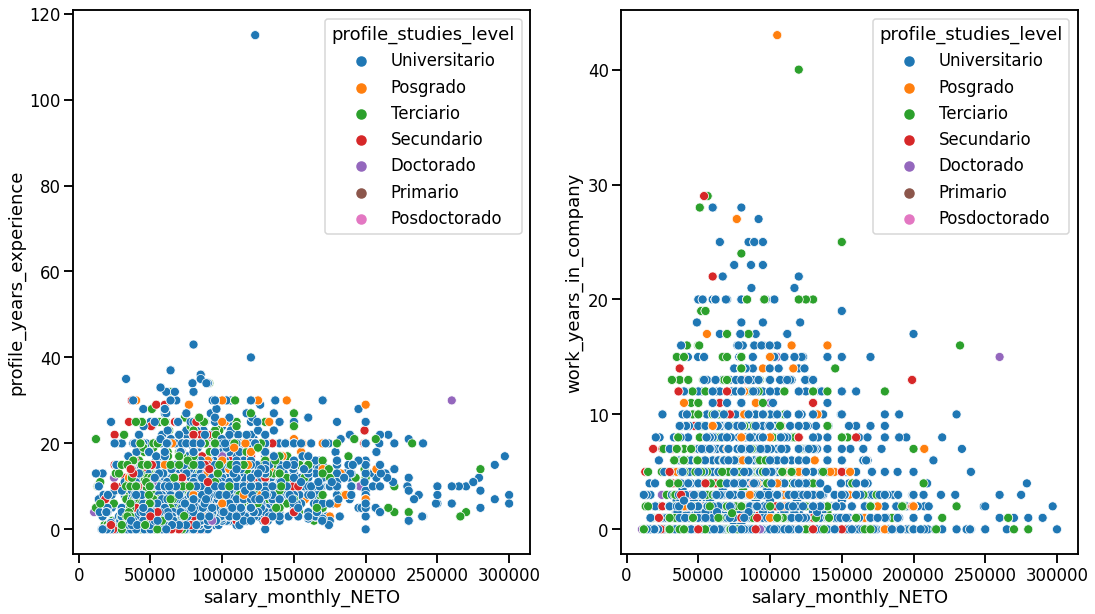

In [97]:

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))



#profile year experience está altamente correlacionada
seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="profile_years_experience" , hue="profile_studies_level")

seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="work_years_in_company" , hue="profile_studies_level")
# 'salary_percentage_inflation_adjustment_2020'

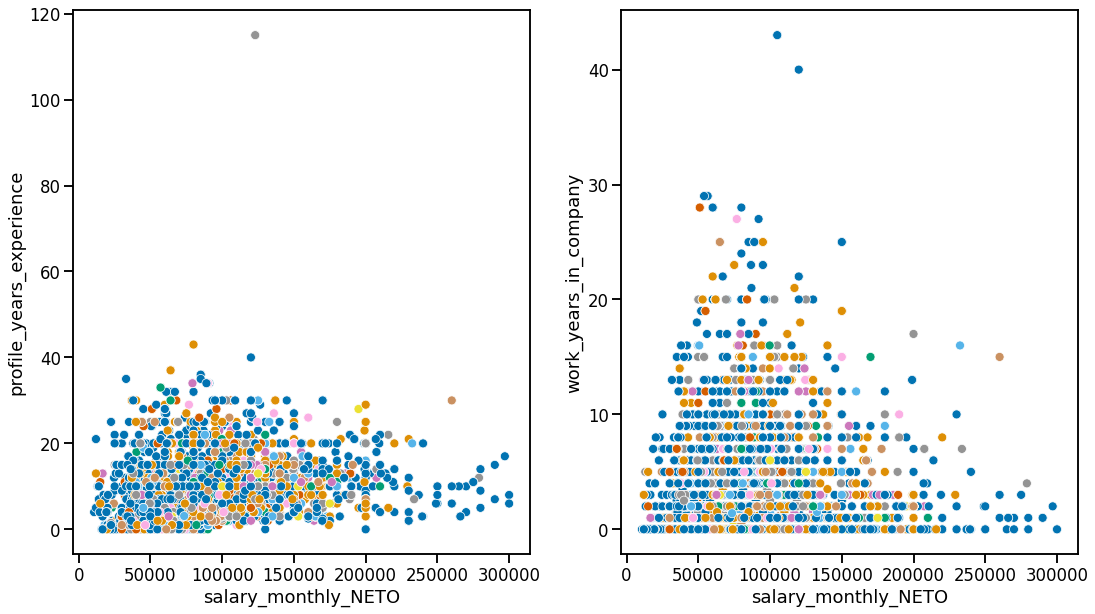

In [140]:

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

#profile year experience está altamente correlacionada
g_ = seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="profile_years_experience" , hue='salary_percentage_inflation_adjustment_2020', palette="colorblind",legend= False)

g = seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="work_years_in_company" , hue='salary_percentage_inflation_adjustment_2020',palette="colorblind",legend= False)


#no puedo agregar el box de legends sin que pise el gráfico

In [80]:
# Se observa un outlayer importante en profile_years_experiencie. Lo eliminamos para que el diagrama no se 'compacte'

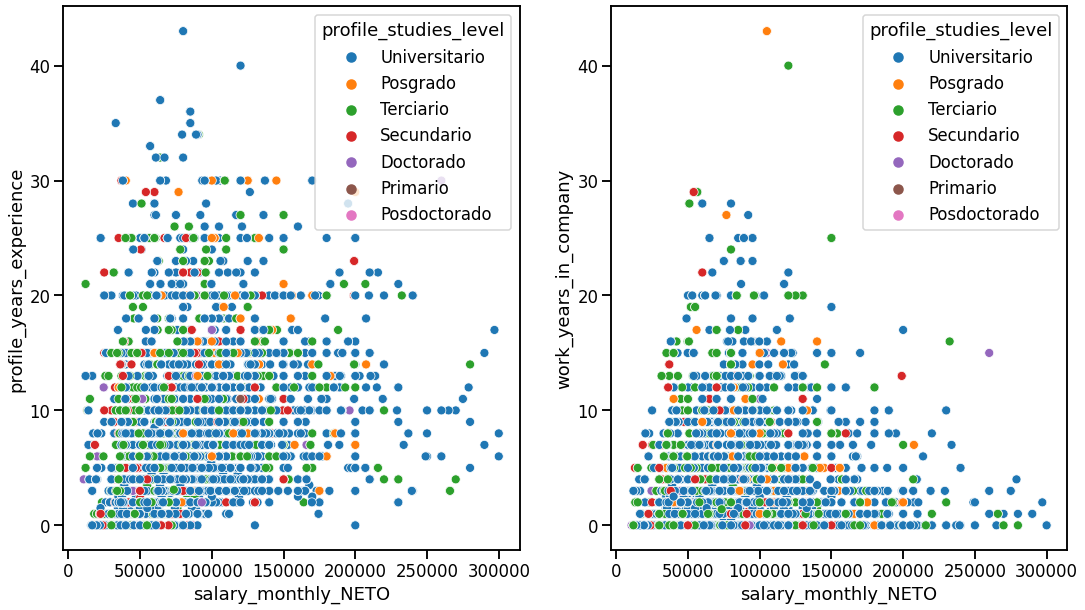

In [81]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2.profile_years_experience < 60], x="salary_monthly_NETO", y="profile_years_experience" , hue="profile_studies_level")

seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2.profile_years_experience < 60], x="salary_monthly_NETO", y="work_years_in_company" , hue="profile_studies_level")